In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/capstone_data/weather_data.csv'
df = pd.read_csv(path)

In [ ]:
df.head()

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,apparentTemperatureHigh,precipType,visibility,humidity,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureMax,uvIndex,time,sunsetTime,temperatureLow,temperatureMin,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,10.87,rain,3.30,0.95,2011-11-11 19:00:00,10.87,11.96,1.0,2011-11-11 00:00:00,2011-11-11 16:19:21,10.87,8.85,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,5.62,rain,12.09,0.88,2011-12-11 19:00:00,-0.64,5.72,1.0,2011-12-11 00:00:00,2011-12-11 15:52:53,3.09,2.48,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53
2,10.33,2011-12-27 02:00:00,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,10.33,rain,13.39,0.74,2011-12-27 14:00:00,5.52,10.33,0.0,2011-12-27 00:00:00,2011-12-27 15:57:56,8.03,8.03,10.33,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10
3,8.07,2011-12-02 23:00:00,232,wind,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,5.33,rain,11.89,0.87,2011-12-02 12:00:00,3.26,5.33,1.0,2011-12-02 00:00:00,2011-12-02 15:56:17,6.33,2.56,7.36,2011-12-02 07:46:09,2011-12-02 12:00:00,2011-12-02 10:00:00,Partly cloudy throughout the day and breezy ov...,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25
4,8.22,2011-12-24 23:00:00,252,partly-cloudy-night,2.79,2011-12-24 07:00:00,0.37,4.46,1028.17,2011-12-24 07:00:00,5.02,rain,13.16,0.80,2011-12-24 15:00:00,4.37,5.32,1.0,2011-12-24 00:00:00,2011-12-24 15:55:55,7.45,3.17,7.93,2011-12-24 08:06:15,2011-12-24 15:00:00,2011-12-24 13:00:00,Mostly cloudy throughout the day.,2011-12-24 19:00:00,-0.51,2011-12-24 23:00:00,2011-12-24 20:00:00,0.99


In [ ]:
df.info

<bound method DataFrame.info of      temperatureMax   temperatureMaxTime  ...  apparentTemperatureLowTime moonPhase
0             11.96  2011-11-11 23:00:00  ...         2011-11-11 19:00:00      0.52
1              8.59  2011-12-11 14:00:00  ...         2011-12-12 08:00:00      0.53
2             10.33  2011-12-27 02:00:00  ...         2011-12-28 00:00:00      0.10
3              8.07  2011-12-02 23:00:00  ...         2011-12-02 19:00:00      0.25
4              8.22  2011-12-24 23:00:00  ...         2011-12-24 20:00:00      0.99
..              ...                  ...  ...                         ...       ...
877            9.03  2014-01-26 16:00:00  ...         2014-01-27 04:00:00      0.84
878           10.31  2014-02-27 14:00:00  ...         2014-02-28 02:00:00      0.93
879           18.97  2014-03-09 14:00:00  ...         2014-03-10 06:00:00      0.28
880            8.83  2014-02-12 16:00:00  ...         2014-02-13 02:00:00      0.42
881            9.90  2014-02-15 12:00:00  ..

In [ ]:
df.dtypes

temperatureMax                 float64
temperatureMaxTime              object
windBearing                      int64
icon                            object
dewPoint                       float64
temperatureMinTime              object
cloudCover                     float64
windSpeed                      float64
pressure                       float64
apparentTemperatureMinTime      object
apparentTemperatureHigh        float64
precipType                      object
visibility                     float64
humidity                       float64
apparentTemperatureHighTime     object
apparentTemperatureLow         float64
apparentTemperatureMax         float64
uvIndex                        float64
time                            object
sunsetTime                      object
temperatureLow                 float64
temperatureMin                 float64
temperatureHigh                float64
sunriseTime                     object
temperatureHighTime             object
uvIndexTime              

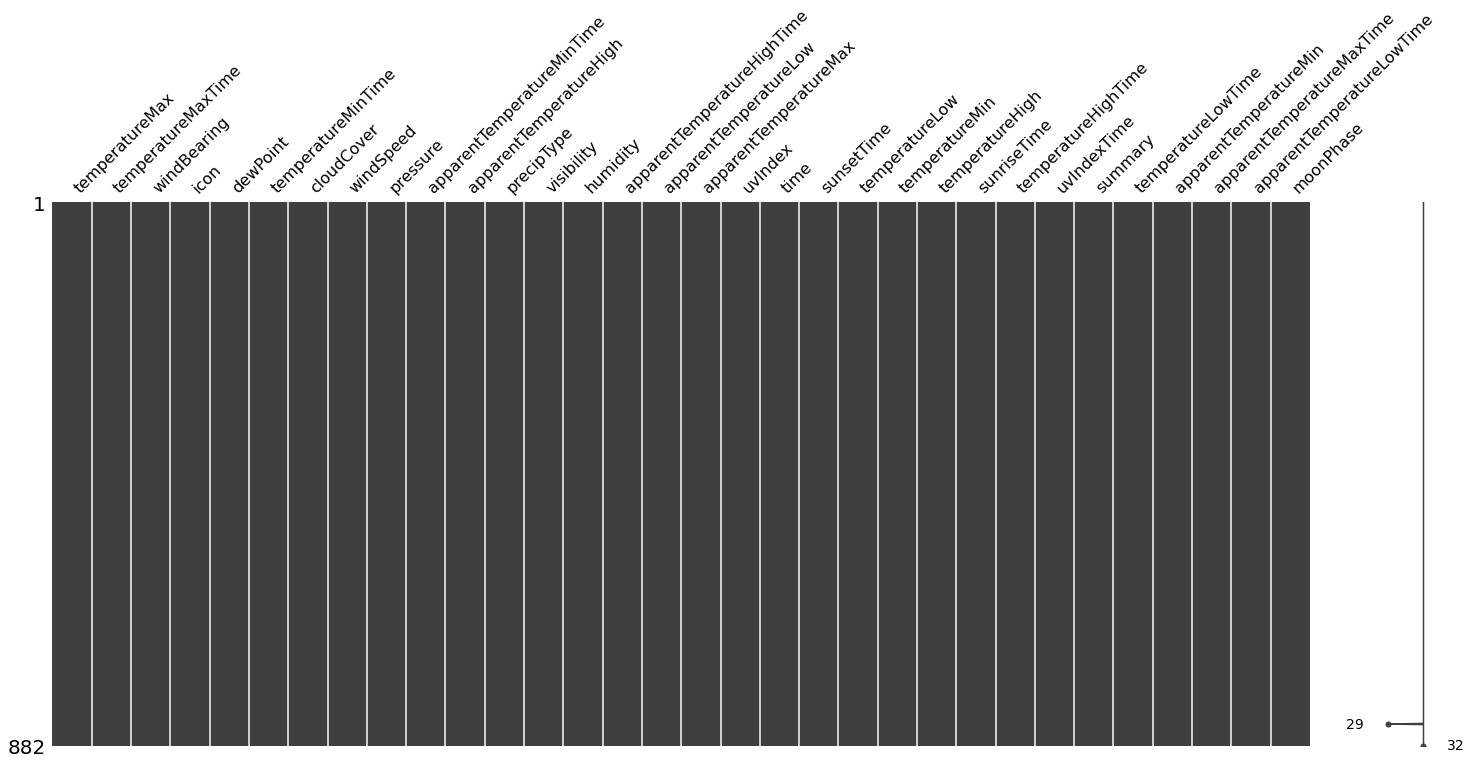

In [ ]:
import matplotlib.pyplot as plt
import missingno as msno
msno.matrix(df)
plt.show()


**Change string format of few column values to dateTime format**

In [ ]:
clmn_list=['apparentTemperatureLowTime','apparentTemperatureMaxTime','temperatureLowTime','uvIndexTime','temperatureHighTime','sunriseTime','sunsetTime','time','temperatureMaxTime','temperatureMinTime','apparentTemperatureMinTime','apparentTemperatureHighTime']
for i in clmn_list:
  df[i] =  pd.to_datetime(df[i], format='%Y-%m-%d %H:%M:%S')


In [ ]:
df.dtypes

temperatureMax                        float64
temperatureMaxTime             datetime64[ns]
windBearing                             int64
icon                                   object
dewPoint                              float64
temperatureMinTime             datetime64[ns]
cloudCover                            float64
windSpeed                             float64
pressure                              float64
apparentTemperatureMinTime     datetime64[ns]
apparentTemperatureHigh               float64
precipType                             object
visibility                            float64
humidity                              float64
apparentTemperatureHighTime    datetime64[ns]
apparentTemperatureLow                float64
apparentTemperatureMax                float64
uvIndex                               float64
time                           datetime64[ns]
sunsetTime                     datetime64[ns]
temperatureLow                        float64
temperatureMin                    

In [ ]:
df['summary'].nunique()

88

 Numerical Data from the main Weather data 

In [ ]:
weather_num = df[['temperatureMax', 'windBearing', 'dewPoint', 'cloudCover', 'windSpeed',
       'pressure', 'apparentTemperatureHigh', 'visibility', 'humidity',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex',
       'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'apparentTemperatureMin', 'moonPhase']]
weather_num.head()

,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase
0,11.96,123,9.40,0.79,3.88,1016.08,10.87,3.30,0.95,10.87,11.96,1.0,10.87,8.85,10.87,6.48,0.52
1,8.59,198,4.49,0.56,3.94,1007.71,5.62,12.09,0.88,-0.64,5.72,1.0,3.09,2.48,8.59,0.11,0.53
2,10.33,225,5.47,0.85,3.54,1032.76,10.33,13.39,0.74,5.52,10.33,0.0,8.03,8.03,10.33,5.59,0.10
3,8.07,232,3.69,0.32,3.00,1012.12,5.33,11.89,0.87,3.26,5.33,1.0,6.33,2.56,7.36,0.46,0.25
4,8.22,252,2.79,0.37,4.46,1028.17,5.02,13.16,0.80,4.37,5.32,1.0,7.45,3.17,7.93,-0.51,0.99


Dropping NULL values

In [ ]:
weather_num = weather_num.dropna()

In [ ]:
weather_num.dtypes

temperatureMax             float64
windBearing                  int64
dewPoint                   float64
cloudCover                 float64
windSpeed                  float64
pressure                   float64
apparentTemperatureHigh    float64
visibility                 float64
humidity                   float64
apparentTemperatureLow     float64
apparentTemperatureMax     float64
uvIndex                    float64
temperatureLow             float64
temperatureMin             float64
temperatureHigh            float64
apparentTemperatureMin     float64
moonPhase                  float64
dtype: object

Correlation between Numerical columns data

In [ ]:
print(weather_num.corr())

                         temperatureMax  ...  moonPhase
temperatureMax                 1.000000  ...   0.000866
windBearing                    0.066226  ...   0.023196
dewPoint                       0.854893  ...  -0.010082
cloudCover                    -0.332584  ...  -0.054542
windSpeed                     -0.147009  ...  -0.021989
pressure                       0.122966  ...   0.044341
apparentTemperatureHigh        0.985890  ...   0.004326
visibility                     0.246552  ...   0.029688
humidity                      -0.399969  ...  -0.009161
apparentTemperatureLow         0.888008  ...   0.003173
apparentTemperatureMax         0.989423  ...  -0.001005
uvIndex                        0.689206  ...   0.017946
temperatureLow                 0.874488  ...  -0.002312
temperatureMin                 0.888572  ...  -0.014235
temperatureHigh                0.997844  ...   0.003987
apparentTemperatureMin         0.904286  ...  -0.006440
moonPhase                      0.000866  ...   1

In [ ]:
# Vizualization of correlation between columns
weather_num.corr().style.background_gradient(cmap='coolwarm')


,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase
temperatureMax,1.000000,0.066226,0.854893,-0.332584,-0.147009,0.122966,0.985890,0.246552,-0.399969,0.888008,0.989423,0.689206,0.874488,0.888572,0.997844,0.904286,0.000866
windBearing,0.066226,1.000000,0.087704,-0.083740,0.078558,-0.030625,0.073090,0.276157,0.001558,0.044036,0.074993,-0.074733,0.048834,0.065370,0.061725,0.052124,0.023196
dewPoint,0.854893,0.087704,1.000000,-0.003382,-0.090370,-0.026797,0.859903,0.021173,0.079938,0.893000,0.864330,0.464695,0.890032,0.937326,0.851468,0.939583,-0.010082
cloudCover,-0.332584,-0.083740,-0.003382,1.000000,0.165238,-0.101524,-0.311122,-0.316673,0.492810,-0.121216,-0.306005,-0.254932,-0.088226,-0.042756,-0.335188,-0.084468,-0.054542
windSpeed,-0.147009,0.078558,-0.090370,0.165238,1.000000,-0.333642,-0.180291,0.290737,-0.056839,-0.138893,-0.167655,-0.138763,-0.063420,-0.015369,-0.155407,-0.128914,-0.021989
pressure,0.122966,-0.030625,-0.026797,-0.101524,-0.333642,1.000000,0.142983,-0.038472,-0.240828,0.097692,0.130172,0.097789,0.059160,0.006636,0.133804,0.057228,0.044341
apparentTemperatureHigh,0.985890,0.073090,0.859903,-0.311122,-0.180291,0.142983,1.000000,0.215557,-0.361853,0.888172,0.994971,0.674402,0.866151,0.882092,0.989197,0.906414,0.004326
visibility,0.246552,0.276157,0.021173,-0.316673,0.290737,-0.038472,0.215557,1.000000,-0.579350,0.140181,0.214508,0.250619,0.154965,0.172932,0.245663,0.130531,0.029688
humidity,-0.399969,0.001558,0.079938,0.492810,-0.056839,-0.240828,-0.361853,-0.579350,1.000000,-0.161737,-0.356773,-0.539316,-0.151515,-0.182868,-0.404803,-0.175450,-0.009161
apparentTemperatureLow,0.888008,0.044036,0.893000,-0.121216,-0.138893,0.097692,0.888172,0.140181,-0.161737,1.000000,0.888829,0.588342,0.981858,0.886959,0.887194,0.906058,0.003173


Block Dataset

In [ ]:
df_block = pd.read_csv("/content/drive/MyDrive/capstone_data/hh_block",error_bad_lines=False)
df_block.head()

,LCLid,day,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,hh_8,hh_9,hh_10,hh_11,hh_12,hh_13,hh_14,hh_15,hh_16,hh_17,hh_18,hh_19,hh_20,hh_21,hh_22,hh_23,hh_24,hh_25,hh_26,hh_27,hh_28,hh_29,hh_30,hh_31,hh_32,hh_33,hh_34,hh_35,hh_36,hh_37,hh_38,hh_39,hh_40,hh_41,hh_42,hh_43,hh_44,hh_45,hh_46,hh_47
0,MAC000002,13-10-2012,0.263,0.269,0.275,0.256,0.211,0.136,0.161,0.119,0.167,0.109,0.168,0.107,0.166,0.117,0.157,0.126,0.146,0.106,0.135,0.191,0.915,0.933,0.122,0.138,0.076,0.133,0.076,0.133,0.085,0.263,0.134,0.235,0.124,0.184,0.230,0.176,0.388,0.260,0.918,0.278,0.267,0.239,0.230,0.233,0.235,0.188,0.259,0.250
1,MAC000002,14-10-2012,0.262,0.166,0.226,0.088,0.126,0.082,0.123,0.083,0.120,0.079,0.121,0.075,0.124,0.073,0.125,0.070,0.130,0.108,0.196,0.346,0.524,0.076,0.129,0.667,0.230,0.220,0.163,0.091,0.170,0.110,0.110,0.121,0.099,0.157,0.093,0.371,0.386,1.085,1.075,0.956,0.821,0.745,0.712,0.511,0.231,0.210,0.278,0.159
2,MAC000002,15-10-2012,0.192,0.097,0.141,0.083,0.132,0.070,0.130,0.074,0.124,0.078,0.118,0.082,0.112,0.087,0.106,0.140,0.120,1.075,0.146,0.123,0.082,0.127,0.077,0.551,0.149,0.129,0.075,0.130,0.075,0.129,0.075,0.128,0.166,0.194,0.695,0.260,0.227,0.255,1.164,0.249,0.225,0.258,0.260,0.334,0.299,0.236,0.241,0.237
3,MAC000002,16-10-2012,0.237,0.237,0.193,0.118,0.098,0.107,0.094,0.109,0.091,0.105,0.091,0.104,0.092,0.103,0.093,0.101,0.144,0.100,0.408,0.102,0.100,0.116,0.354,0.146,0.190,0.991,0.310,0.121,0.113,0.094,0.119,0.087,0.130,0.238,0.204,0.284,0.447,0.266,0.966,0.172,0.192,0.228,0.203,0.211,0.188,0.213,0.157,0.202
4,MAC000002,17-10-2012,0.157,0.211,0.155,0.169,0.101,0.117,0.084,0.118,0.080,0.119,0.075,0.123,0.071,0.126,0.067,0.124,0.118,0.132,0.358,0.628,0.784,0.681,0.749,0.593,0.502,0.115,0.113,0.092,0.124,0.084,0.125,0.078,0.136,0.227,0.207,0.141,0.258,0.217,0.223,0.075,0.230,0.208,0.265,0.377,0.327,0.277,0.288,0.256


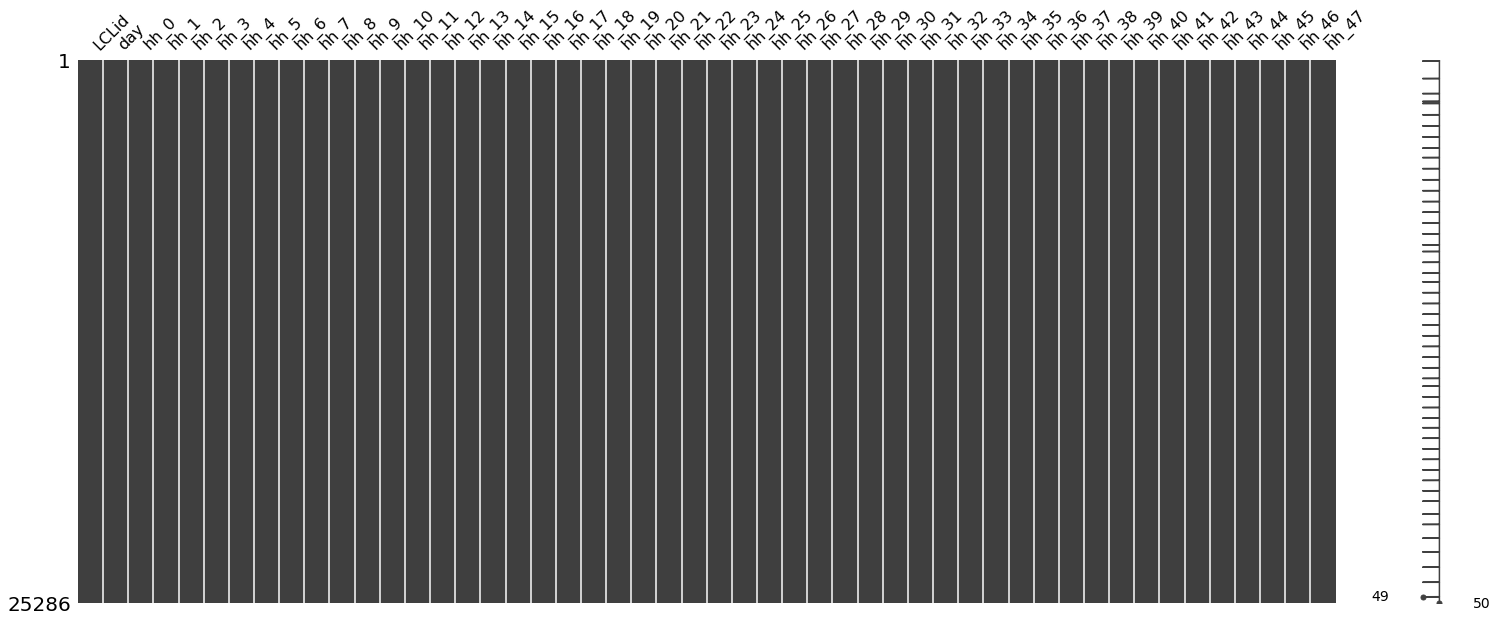

In [ ]:
msno.matrix(df_block)

In [ ]:
df_counts=pd.DataFrame(df_block['LCLid'].value_counts())
df_counts.head()

,LCLid
MAC000246,814
MAC004387,708
MAC004431,697
MAC004179,646
MAC004319,642


House Hold with maximum records 'MAC000246'

In [ ]:
max_hh='MAC000246'
hh_data = df_block[df_block['LCLid'] == max_hh]

In [ ]:
hh_data.head(2)

,LCLid,day,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,hh_8,hh_9,hh_10,hh_11,hh_12,hh_13,hh_14,hh_15,hh_16,hh_17,hh_18,hh_19,hh_20,hh_21,hh_22,hh_23,hh_24,hh_25,hh_26,hh_27,hh_28,hh_29,hh_30,hh_31,hh_32,hh_33,hh_34,hh_35,hh_36,hh_37,hh_38,hh_39,hh_40,hh_41,hh_42,hh_43,hh_44,hh_45,hh_46,hh_47
498,MAC000246,04-12-2011,0.175,0.098,0.144,0.065,0.071,0.037,0.047,0.042,0.052,0.078,0.039,0.050,0.026,0.091,0.095,0.096,0.658,0.459,0.801,0.933,1.213,0.175,0.179,0.989,1.914,1.421,1.535,0.634,1.219,0.821,0.233,0.132,0.128,0.118,0.077,0.095,0.081,0.097,0.134,0.314,0.822,0.226,0.190,1.054,1.116,0.936,0.478,0.375
499,MAC000246,05-12-2011,0.471,0.934,0.326,0.143,0.130,0.109,0.123,0.088,0.092,0.090,0.118,0.098,0.087,0.094,0.080,0.288,0.354,0.239,0.025,0.039,0.035,0.031,0.079,0.041,0.047,0.031,0.073,0.061,0.077,0.077,0.036,0.054,0.053,0.056,0.113,0.052,0.049,0.070,0.036,0.127,0.074,0.060,0.054,0.050,0.066,0.079,0.164,0.347


In [ ]:
hh_data['overall_consumption'] = hh_data.sum(axis=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
hh_data.head(3)

,LCLid,day,hh_0,hh_1,hh_2,hh_3,hh_4,hh_5,hh_6,hh_7,hh_8,hh_9,hh_10,hh_11,hh_12,hh_13,hh_14,hh_15,hh_16,hh_17,hh_18,hh_19,hh_20,hh_21,hh_22,hh_23,hh_24,hh_25,hh_26,hh_27,hh_28,hh_29,hh_30,hh_31,hh_32,hh_33,hh_34,hh_35,hh_36,hh_37,hh_38,hh_39,hh_40,hh_41,hh_42,hh_43,hh_44,hh_45,hh_46,hh_47,overall_consumption
498,MAC000246,04-12-2011,0.175,0.098,0.144,0.065,0.071,0.037,0.047,0.042,0.052,0.078,0.039,0.050,0.026,0.091,0.095,0.096,0.658,0.459,0.801,0.933,1.213,0.175,0.179,0.989,1.914,1.421,1.535,0.634,1.219,0.821,0.233,0.132,0.128,0.118,0.077,0.095,0.081,0.097,0.134,0.314,0.822,0.226,0.190,1.054,1.116,0.936,0.478,0.375,20.763
499,MAC000246,05-12-2011,0.471,0.934,0.326,0.143,0.130,0.109,0.123,0.088,0.092,0.090,0.118,0.098,0.087,0.094,0.080,0.288,0.354,0.239,0.025,0.039,0.035,0.031,0.079,0.041,0.047,0.031,0.073,0.061,0.077,0.077,0.036,0.054,0.053,0.056,0.113,0.052,0.049,0.070,0.036,0.127,0.074,0.060,0.054,0.050,0.066,0.079,0.164,0.347,6.020
500,MAC000246,06-12-2011,0.303,1.216,0.914,0.467,0.660,0.705,0.154,0.108,0.127,0.084,0.089,0.099,0.096,0.149,0.095,0.118,0.110,0.507,0.279,0.216,0.470,0.127,0.153,0.163,0.411,0.077,0.051,0.053,0.027,0.061,0.054,0.075,0.076,0.047,0.055,0.064,0.054,0.100,0.048,0.062,0.057,0.101,0.597,0.344,1.042,0.948,0.523,0.986,13.322


In [ ]:
hh_data['overall_consumption']

498     20.763
499      6.020
500     13.322
501      9.062
502     13.664
         ...  
1307    29.716
1308    18.935
1309    23.717
1310    15.562
1311    16.026
Name: overall_consumption, Length: 814, dtype: float64

In [ ]:
hh_data['year'] = pd.DatetimeIndex(hh_data['day']).year
hh_data['month'] = pd.DatetimeIndex(hh_data['day']).month
hh_data['date'] = pd.DatetimeIndex(hh_data['day']).day

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
hh_data = hh_data.reset_index()

In [ ]:
hh_data = hh_data[['day', 'overall_consumption','year','month','date']]

In [ ]:
hh_data.head()
hh_data.dtypes
hh_data.info()
hh_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   day                  814 non-null    object 
 1   overall_consumption  814 non-null    float64
 2   year                 814 non-null    int64  
 3   month                814 non-null    int64  
 4   date                 814 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 31.9+ KB


,overall_consumption,year,month,date
count,814.000000,814.000000,814.000000,814.000000
mean,16.834709,2012.554054,6.445946,15.631450
std,6.970511,0.677454,3.592928,8.912409
min,3.571000,2011.000000,1.000000,1.000000
25%,11.271000,2012.000000,3.000000,8.000000
50%,16.491000,2013.000000,6.000000,16.000000
75%,21.097500,2013.000000,10.000000,23.000000
max,47.168000,2014.000000,12.000000,31.000000


In [ ]:
from  scipy.stats import skew, kurtosis, shapiro
import numpy as np

mean = np.mean(hh_data.overall_consumption.values)
std = np.std(hh_data.overall_consumption.values)
skew = skew(hh_data.overall_consumption.values)
ex_kurt = kurtosis(hh_data.overall_consumption)
print("Skewness: {} \nKurtosis: {}".format(skew, ex_kurt+3))

Skewness: 0.5757792208459902 
Kurtosis: 3.3603468268671506


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


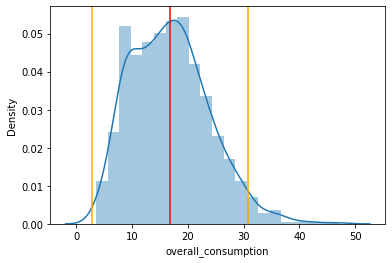

In [ ]:
# Normality
import seaborn as sns
sns.distplot(hh_data['overall_consumption'])

plt.axvline(x=mean, color='r', linestyle='-', label="\mu: {0:.2f}%".format(mean))
plt.axvline(x=mean+2*std, color='orange', linestyle='-')
plt.axvline(x=mean-2*std, color='orange', linestyle='-')

# The plot almost normal distribution

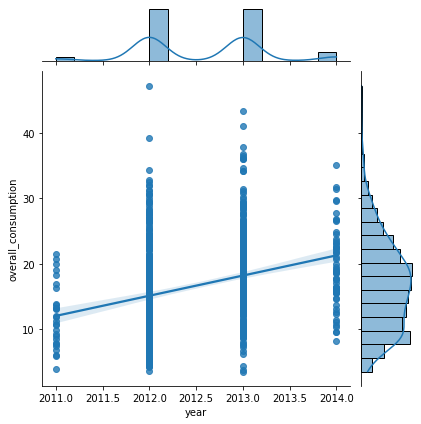

In [ ]:
sns.jointplot(x=hh_data["year"],
              y=hh_data["overall_consumption"],
              data=hh_data,
             kind="reg")

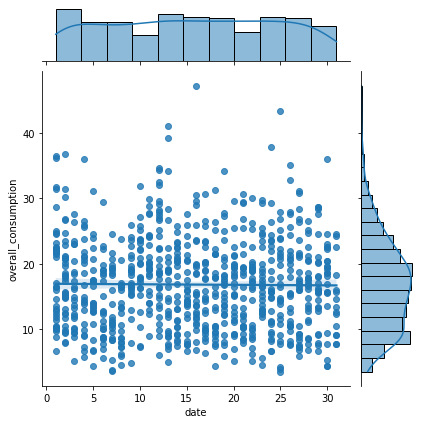

In [ ]:
sns.jointplot(x=hh_data["date"],
              y=hh_data["overall_consumption"],
              data=hh_data,
             kind="reg")

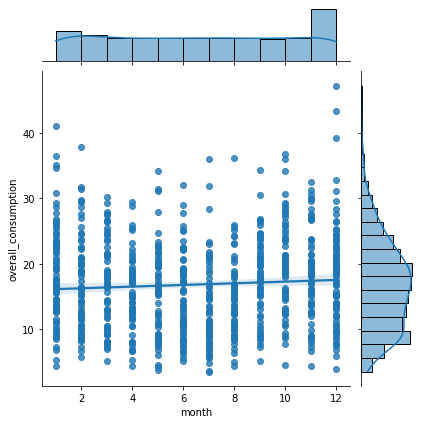

In [ ]:
sns.jointplot(x=hh_data["month"],
              y=hh_data["overall_consumption"],
              data=hh_data,
             kind="reg")

In [ ]:
weather = pd.read_csv('/content/drive/MyDrive/capstone_data/weather_data.csv')
weather.head(4)

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,apparentTemperatureHigh,precipType,visibility,humidity,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureMax,uvIndex,time,sunsetTime,temperatureLow,temperatureMin,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,10.87,rain,3.30,0.95,2011-11-11 19:00:00,10.87,11.96,1.0,2011-11-11 00:00:00,2011-11-11 16:19:21,10.87,8.85,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,5.62,rain,12.09,0.88,2011-12-11 19:00:00,-0.64,5.72,1.0,2011-12-11 00:00:00,2011-12-11 15:52:53,3.09,2.48,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53
2,10.33,2011-12-27 02:00:00,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,10.33,rain,13.39,0.74,2011-12-27 14:00:00,5.52,10.33,0.0,2011-12-27 00:00:00,2011-12-27 15:57:56,8.03,8.03,10.33,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10
3,8.07,2011-12-02 23:00:00,232,wind,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,5.33,rain,11.89,0.87,2011-12-02 12:00:00,3.26,5.33,1.0,2011-12-02 00:00:00,2011-12-02 15:56:17,6.33,2.56,7.36,2011-12-02 07:46:09,2011-12-02 12:00:00,2011-12-02 10:00:00,Partly cloudy throughout the day and breezy ov...,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25


In [ ]:
import datetime as dt
def changeDateFormat(date): 
    date = dt.datetime.strptime(date, '%Y-%m-%d %H:%M:%S').strftime('%d-%m-%Y')
    return(date)

dtx = []
for t in weather['time']:
    dtx.append(changeDateFormat(t))
    
weather['date'] = pd.DataFrame(dtx)
weather.head()

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,apparentTemperatureHigh,precipType,visibility,humidity,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureMax,uvIndex,time,sunsetTime,temperatureLow,temperatureMin,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase,date
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,10.87,rain,3.30,0.95,2011-11-11 19:00:00,10.87,11.96,1.0,2011-11-11 00:00:00,2011-11-11 16:19:21,10.87,8.85,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52,11-11-2011
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,5.62,rain,12.09,0.88,2011-12-11 19:00:00,-0.64,5.72,1.0,2011-12-11 00:00:00,2011-12-11 15:52:53,3.09,2.48,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53,11-12-2011
2,10.33,2011-12-27 02:00:00,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,10.33,rain,13.39,0.74,2011-12-27 14:00:00,5.52,10.33,0.0,2011-12-27 00:00:00,2011-12-27 15:57:56,8.03,8.03,10.33,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10,27-12-2011
3,8.07,2011-12-02 23:00:00,232,wind,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,5.33,rain,11.89,0.87,2011-12-02 12:00:00,3.26,5.33,1.0,2011-12-02 00:00:00,2011-12-02 15:56:17,6.33,2.56,7.36,2011-12-02 07:46:09,2011-12-02 12:00:00,2011-12-02 10:00:00,Partly cloudy throughout the day and breezy ov...,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25,02-12-2011
4,8.22,2011-12-24 23:00:00,252,partly-cloudy-night,2.79,2011-12-24 07:00:00,0.37,4.46,1028.17,2011-12-24 07:00:00,5.02,rain,13.16,0.80,2011-12-24 15:00:00,4.37,5.32,1.0,2011-12-24 00:00:00,2011-12-24 15:55:55,7.45,3.17,7.93,2011-12-24 08:06:15,2011-12-24 15:00:00,2011-12-24 13:00:00,Mostly cloudy throughout the day.,2011-12-24 19:00:00,-0.51,2011-12-24 23:00:00,2011-12-24 20:00:00,0.99,24-12-2011


In [ ]:
# selecting numeric variables
weather = weather[['temperatureMax', 'windBearing', 'dewPoint', 'cloudCover', 'windSpeed',
       'pressure', 'apparentTemperatureHigh', 'visibility', 'humidity',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex',
       'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'apparentTemperatureMin', 'moonPhase','date']]
weather = weather.dropna()
weather.head()

,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,date
0,11.96,123,9.40,0.79,3.88,1016.08,10.87,3.30,0.95,10.87,11.96,1.0,10.87,8.85,10.87,6.48,0.52,11-11-2011
1,8.59,198,4.49,0.56,3.94,1007.71,5.62,12.09,0.88,-0.64,5.72,1.0,3.09,2.48,8.59,0.11,0.53,11-12-2011
2,10.33,225,5.47,0.85,3.54,1032.76,10.33,13.39,0.74,5.52,10.33,0.0,8.03,8.03,10.33,5.59,0.10,27-12-2011
3,8.07,232,3.69,0.32,3.00,1012.12,5.33,11.89,0.87,3.26,5.33,1.0,6.33,2.56,7.36,0.46,0.25,02-12-2011
4,8.22,252,2.79,0.37,4.46,1028.17,5.02,13.16,0.80,4.37,5.32,1.0,7.45,3.17,7.93,-0.51,0.99,24-12-2011


In [ ]:
weather_energy =  hh_data.merge(weather,left_on='day',right_on='date')
weather_energy.head()

,day,overall_consumption,year,month,date_x,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,date_y
0,04-12-2011,20.763,2011,4,12,9.11,254,4.87,0.36,4.31,1001.15,6.66,13.36,0.82,-1.69,6.66,1.0,2.81,4.69,9.11,1.03,0.31,04-12-2011
1,05-12-2011,6.020,2011,5,12,6.87,254,0.84,0.20,5.57,1006.01,3.13,13.00,0.77,-1.61,3.13,1.0,2.68,2.81,6.87,-1.69,0.34,05-12-2011
2,06-12-2011,13.322,2011,6,12,6.91,245,2.15,0.34,4.79,1007.32,3.77,13.15,0.83,1.90,3.77,1.0,5.16,2.68,6.91,-1.61,0.37,06-12-2011
3,07-12-2011,9.062,2011,7,12,9.02,263,1.79,0.29,7.06,1008.76,4.98,13.12,0.68,0.63,5.14,1.0,4.27,4.91,9.02,0.94,0.40,07-12-2011
4,08-12-2011,13.664,2011,8,12,12.89,234,5.96,0.53,7.01,1010.84,12.89,12.59,0.81,-0.37,12.89,1.0,3.76,4.27,12.89,0.63,0.43,08-12-2011


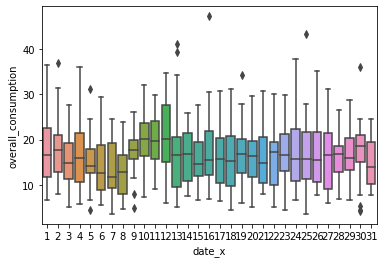

In [ ]:
sns.boxplot(x="date_x", y="overall_consumption", data=weather_energy)



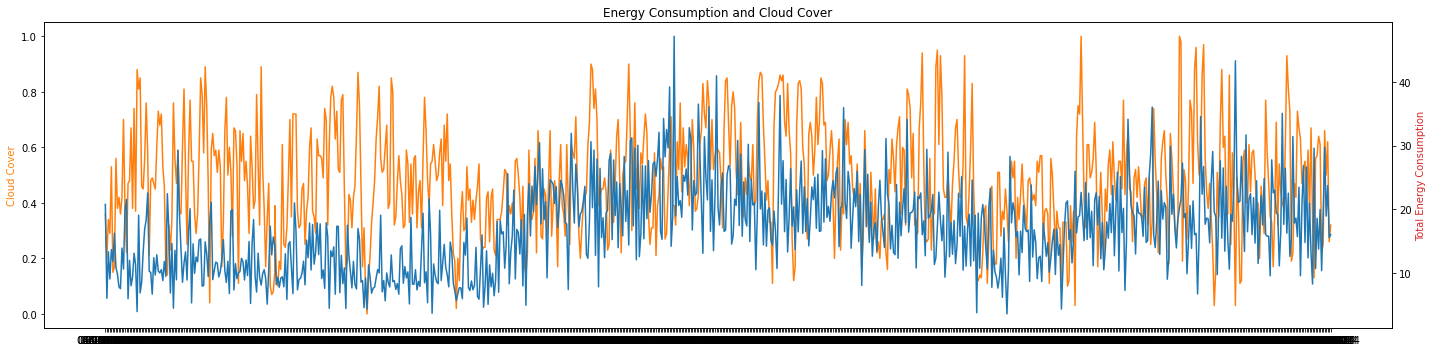

In [ ]:
# Cloud Cover

## Cloud cover shows similar trends as the electricity consumption

fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy.day, weather_energy.cloudCover, color = 'tab:orange')
ax1.set_ylabel('Cloud Cover',color = 'tab:orange')
ax2 = ax1.twinx()
ax2.plot(weather_energy.day,weather_energy.overall_consumption,color = 'tab:blue')
ax2.set_ylabel('Total Energy Consumption',color = 'tab:red')
plt.title('Energy Consumption and Cloud Cover')
fig.tight_layout()
plt.show()

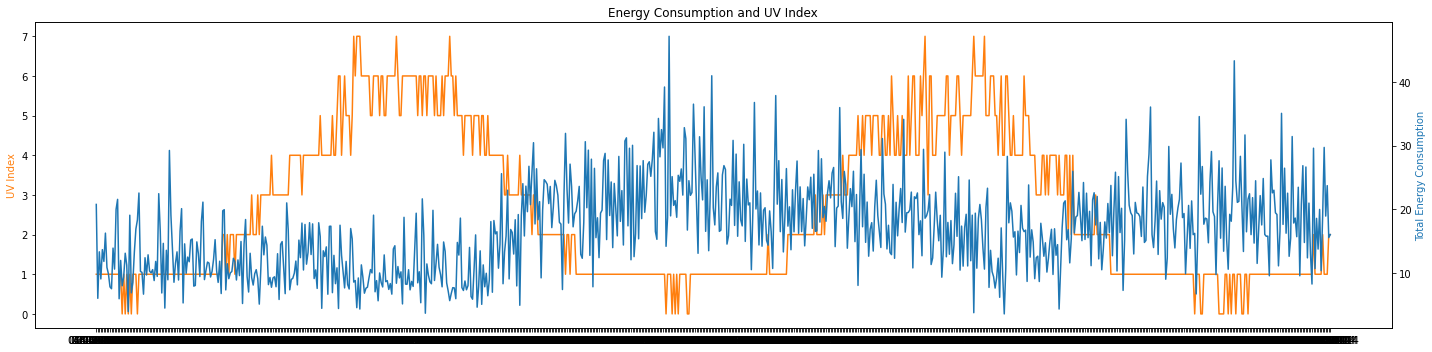

In [ ]:
# UV index

## The UV index has an inverse relationship with the electricity consumption. Reason, not sure.

fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy.day, weather_energy.uvIndex, color = 'tab:orange')
ax1.set_ylabel('UV Index',color = 'tab:orange')
ax2 = ax1.twinx()
ax2.plot(weather_energy.day,weather_energy.overall_consumption,color = 'tab:blue')
ax2.set_ylabel('Total Energy Consumption',color = 'tab:blue')
plt.title('Energy Consumption and UV Index')
fig.tight_layout()
plt.show()


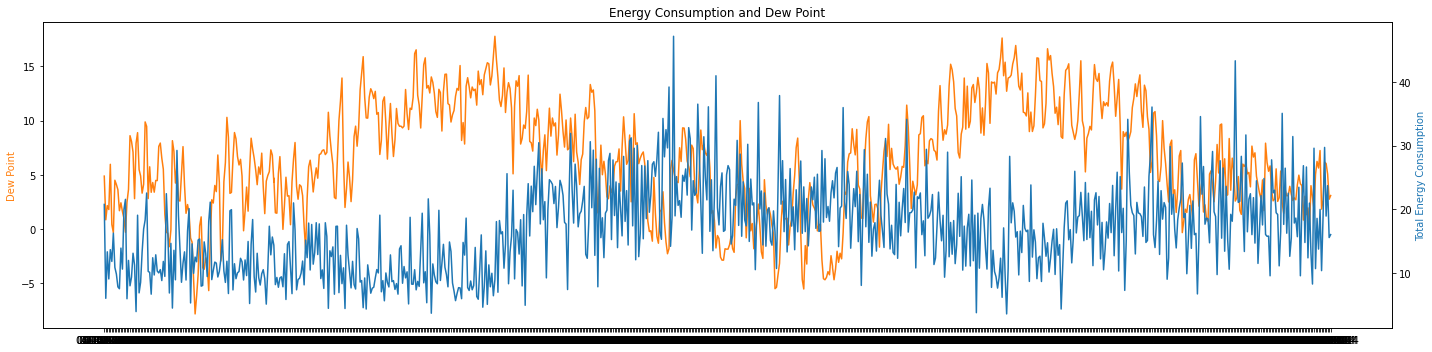

In [ ]:
# dewPoint

## Dew point is a function of humidity and temperature. Hence, it is seems to have similar relationship with energy consumption.
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(weather_energy.day, weather_energy.dewPoint, color = 'tab:orange')
ax1.set_ylabel('Dew Point',color = 'tab:orange')
ax2 = ax1.twinx()
ax2.plot(weather_energy.day,weather_energy.overall_consumption,color = 'tab:blue')
ax2.set_ylabel('Total Energy Consumption',color = 'tab:blue')
plt.title('Energy Consumption and Dew Point')
fig.tight_layout()
plt.show()

In [ ]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
weather_scaled = scaler.fit_transform(weather_energy[['temperatureMax','humidity','windSpeed']])
weather_scaled

array([[0.28250154, 0.70909091, 0.42110656],
       [0.21349353, 0.61818182, 0.55020492],
       [0.21472582, 0.72727273, 0.47028689],
       ...,
       [0.35397412, 0.63636364, 0.5625    ],
       [0.34966112, 0.54545455, 0.37090164],
       [0.31947012, 0.56363636, 0.40368852]])

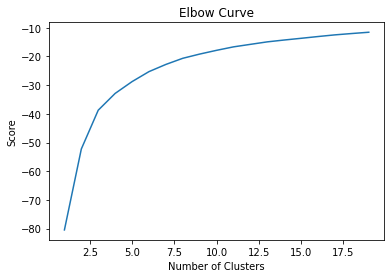

In [ ]:
# optimum K
!pip3 install KMeans
from sklearn.cluster import KMeans
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans

score = [kmeans[i].fit(weather_scaled).score(weather_scaled) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
kmeans.fit(weather_scaled)
weather_energy['weather_cluster'] = kmeans.labels_

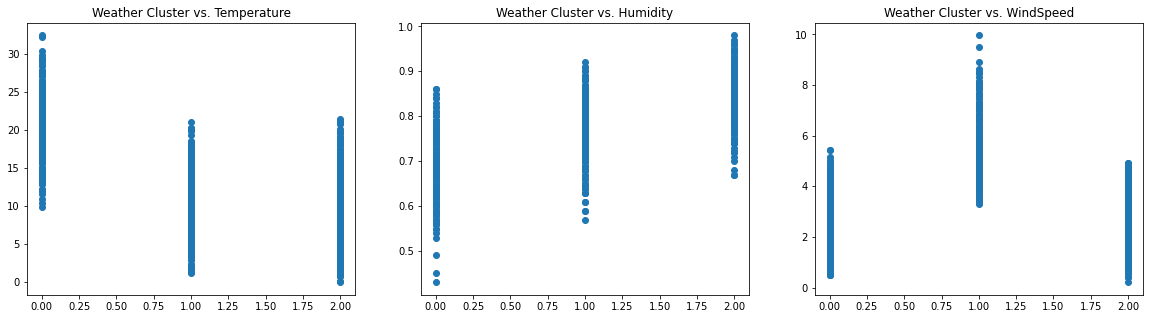

In [ ]:
# Cluster Relationships with weather variables
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)

plt.scatter(weather_energy.weather_cluster,weather_energy.temperatureMax)
plt.title('Weather Cluster vs. Temperature')
plt.subplot(1, 3, 2)

plt.scatter(weather_energy.weather_cluster,weather_energy.humidity)
plt.title('Weather Cluster vs. Humidity')
plt.subplot(1, 3, 3)

plt.scatter(weather_energy.weather_cluster,weather_energy.windSpeed)
plt.title('Weather Cluster vs. WindSpeed')

plt.show()

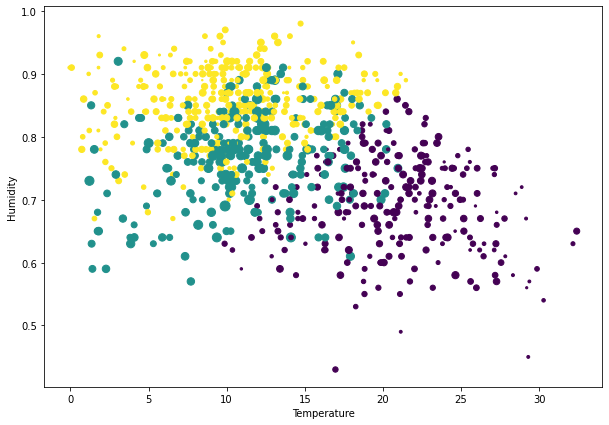

In [ ]:
fig, ax1 = plt.subplots(figsize = (10,7))
ax1.scatter(weather_energy.temperatureMax, 
            weather_energy.humidity,
            s = weather_energy.windSpeed*10,
            c = weather_energy.weather_cluster)
ax1.set_xlabel('Temperature')
ax1.set_ylabel('Humidity')
plt.show()

In [ ]:
holiday = pd.read_csv('https://raw.githubusercontent.com/safdhar-ali/electricity-forecasting/master/uk_bank_holidays.csv')

dtx = []
for t in holiday['Bank holidays']:
    dtx.append(dt.datetime.strptime(t, '%Y-%m-%d').strftime('%d-%m-%Y'))
        
holiday['Bank holidays'] = pd.DataFrame(dtx)
holiday.head()

,Bank holidays,Type
0,26-12-2012,Boxing Day
1,25-12-2012,Christmas Day
2,27-08-2012,Summer bank holiday
3,06-05-2012,Queen?s Diamond Jubilee (extra bank holiday)
4,06-04-2012,Spring bank holiday (substitute day)


In [ ]:
weather_energy = weather_energy.merge(holiday, left_on = 'day',right_on = 'Bank holidays',how = 'left')
weather_energy['holiday_ind'] = np.where(weather_energy['Bank holidays'].isna(),0,1)

In [ ]:
weather_energy.groupby('holiday_ind').count()

,day,overall_consumption,year,month,date_x,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,date_y,weather_cluster,Bank holidays,Type
holiday_ind,,,,,,,,,,,,,,,,,,,,,,,,,,
0,796,796,796,796,796,796,796,796,796,796,796,796,796,796,796,796,796,796,796,796,796,796,796,796,0,0
1,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17


In [ ]:
weather_energy.head()

,day,overall_consumption,year,month,date_x,temperatureMax,windBearing,dewPoint,cloudCover,windSpeed,pressure,apparentTemperatureHigh,visibility,humidity,apparentTemperatureLow,apparentTemperatureMax,uvIndex,temperatureLow,temperatureMin,temperatureHigh,apparentTemperatureMin,moonPhase,date_y,weather_cluster,Bank holidays,Type,holiday_ind
0,04-12-2011,20.763,2011,4,12,9.11,254,4.87,0.36,4.31,1001.15,6.66,13.36,0.82,-1.69,6.66,1.0,2.81,4.69,9.11,1.03,0.31,04-12-2011,1,NaN,NaN,0
1,05-12-2011,6.020,2011,5,12,6.87,254,0.84,0.20,5.57,1006.01,3.13,13.00,0.77,-1.61,3.13,1.0,2.68,2.81,6.87,-1.69,0.34,05-12-2011,1,NaN,NaN,0
2,06-12-2011,13.322,2011,6,12,6.91,245,2.15,0.34,4.79,1007.32,3.77,13.15,0.83,1.90,3.77,1.0,5.16,2.68,6.91,-1.61,0.37,06-12-2011,1,NaN,NaN,0
3,07-12-2011,9.062,2011,7,12,9.02,263,1.79,0.29,7.06,1008.76,4.98,13.12,0.68,0.63,5.14,1.0,4.27,4.91,9.02,0.94,0.40,07-12-2011,1,NaN,NaN,0
4,08-12-2011,13.664,2011,8,12,12.89,234,5.96,0.53,7.01,1010.84,12.89,12.59,0.81,-0.37,12.89,1.0,3.76,4.27,12.89,0.63,0.43,08-12-2011,1,NaN,NaN,0


In [ ]:
weather_energy.set_index(['day'],inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
# Split the dataset into 80 - 20 as train and test sets
model_data = weather_energy[['overall_consumption','weather_cluster','holiday_ind']]

train, test = train_test_split(model_data, test_size = 0.2,shuffle=False)

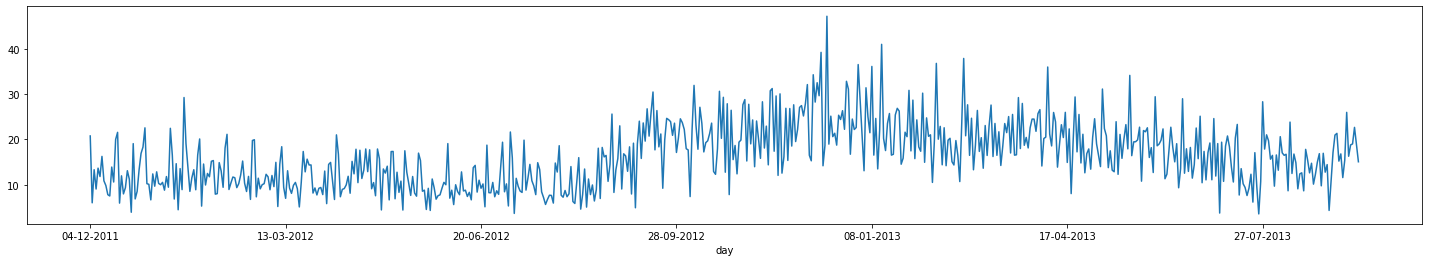

In [ ]:
train['overall_consumption'].plot(figsize=(25,4))

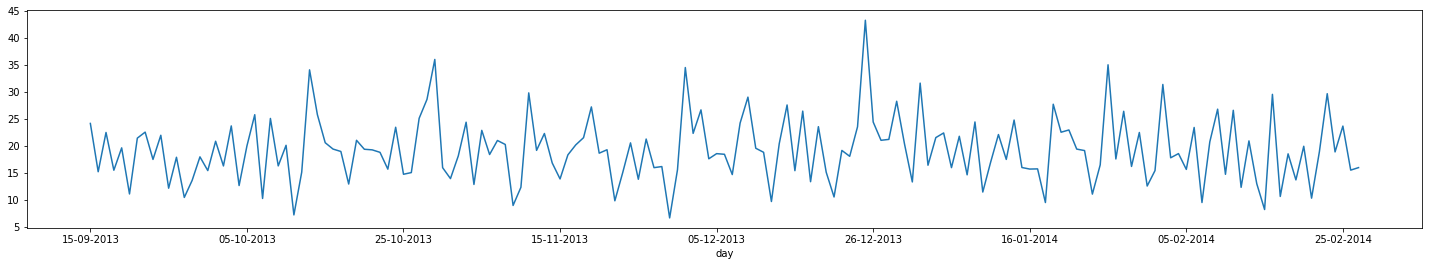

In [ ]:
test['overall_consumption'].plot(figsize=(25,4))

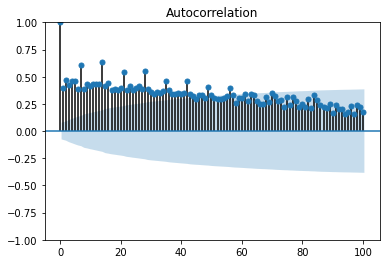

In [ ]:
# ACF

## This plot displays a gradual decay 
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(train.overall_consumption,lags=100)
plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


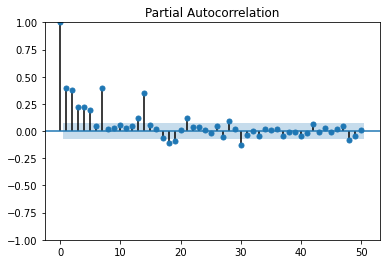

In [ ]:
plot_pacf(train.overall_consumption,lags=50)
plt.show()

In [ ]:
pip install --upgrade --no-deps statsmodels

In [ ]:
from pandas.util._decorators import Appender
import statsmodels.api as sm

In [ ]:
# Dickey fuller's test

## Since the p > 0.05 the data is not stationary.

t = sm.tsa.adfuller(train.overall_consumption, autolag='AIC')
pd.Series(t[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

Test Statistic                  -1.601199
p-value                          0.482991
#Lags Used                      20.000000
Number of Observations Used    629.000000
dtype: float64

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

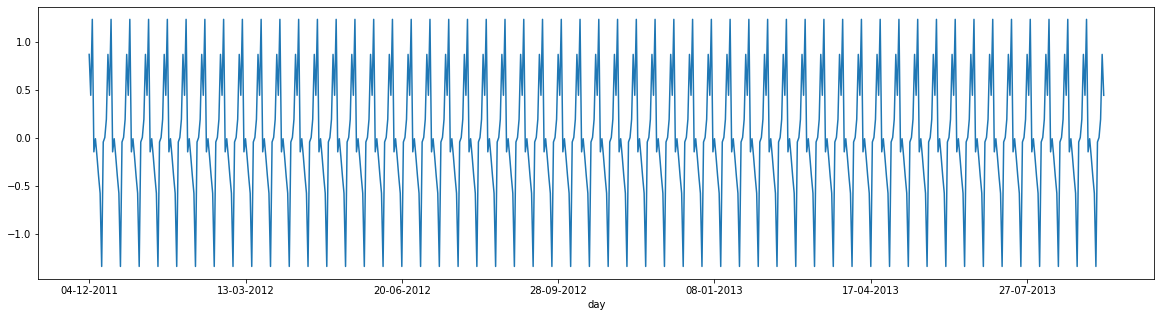

In [ ]:
# Seasonal decomposition

s = sm.tsa.seasonal_decompose(train.overall_consumption,extrapolate_trend='freq', period=12)
s.seasonal.plot(figsize=(20,5))

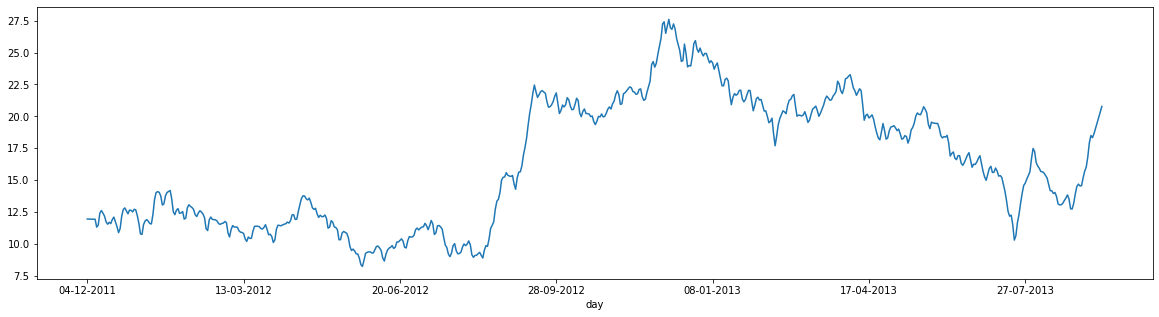

In [ ]:
s.trend.plot(figsize=(20,5))

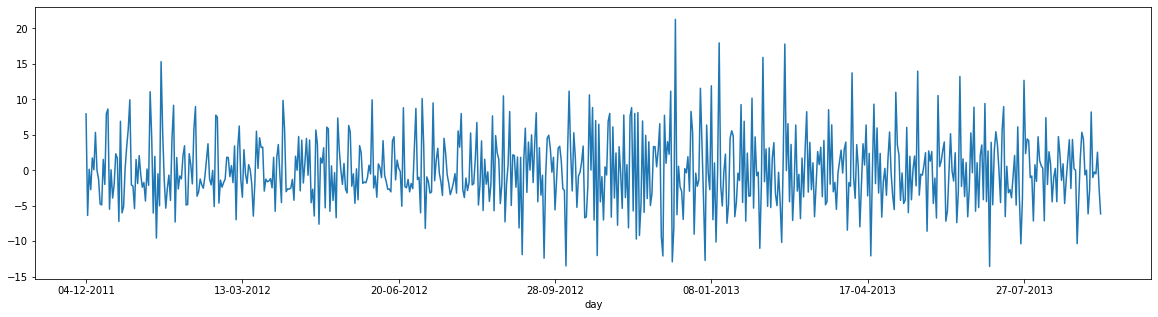

In [ ]:
s.resid.plot(figsize=(20,5))

In [ ]:
endog = train['overall_consumption']
exog = train[['weather_cluster','holiday_ind']]

mod = sm.tsa.statespace.SARIMAX(endog=endog, exog=exog, order=(1,0,1),seasonal_order=(1,1, 0, 12))
model_fit = mod.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:599: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:595: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:599: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                 overall_consumption   No. Observations:                  650
Model:             SARIMAX(1, 0, 1)x(1, 1, [], 12)   Log Likelihood               -2114.716
Date:                             Tue, 07 Dec 2021   AIC                           4241.432
Time:                                     19:57:16   BIC                           4268.182
Sample:                                          0   HQIC                          4251.817
                                             - 650                                         
Covariance Type:                               opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
weather_cluster     0.7748      0.356      2.175      0.030       0.077       1.473
holiday_ind         1.6688      1.155      1.445      0.148      -0.594       3.932
ar.L1              -0.4626      0.475     -0.973      0.330      -1.394       0.469
ma.L1               0.4063      0.494      0.823      0.411      -0.562       1.374
ar.S.L12           -0.4669      0.032    -14.428      0.000      -0.530      -0.403
sigma2             44.1087      2.326     18.961      0.000      39.549      48.668
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 2.90
Prob(Q):                              0.84   Prob(JB):                         0.24
Heteroskedasticity (H):               1.55   Skew:                             0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

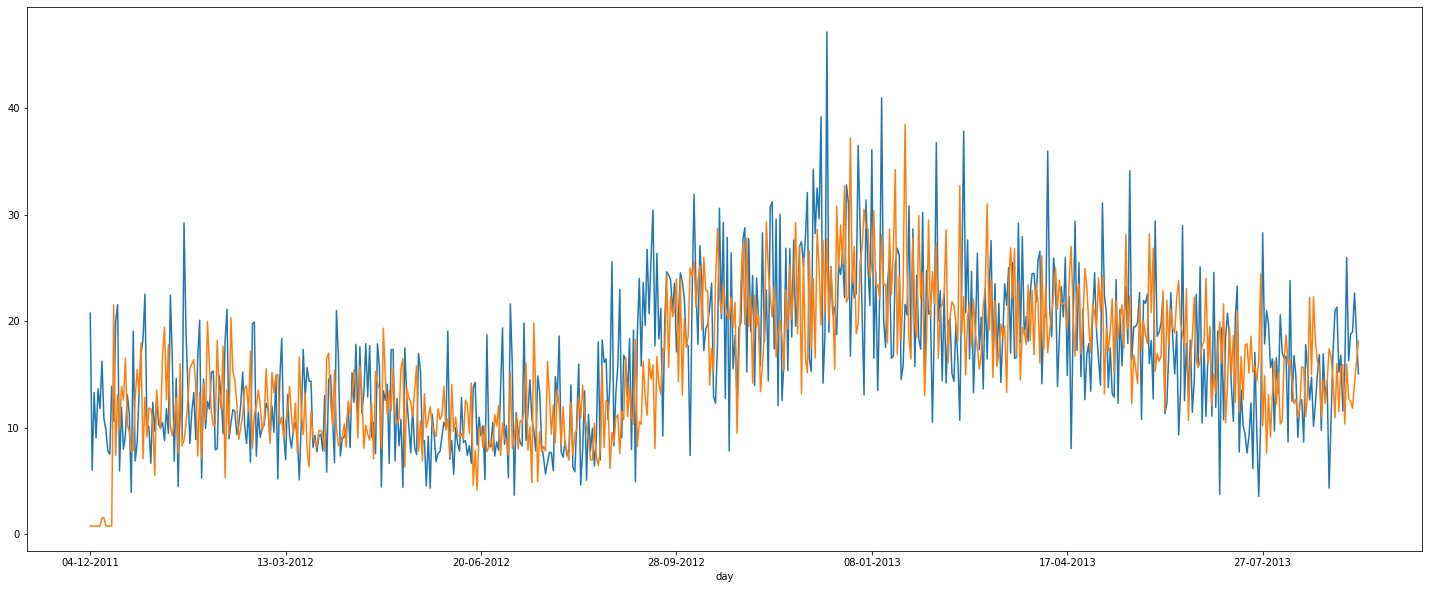

In [ ]:
# Model training

train['overall_consumption'].plot(figsize=(25,10))
model_fit.fittedvalues.plot()
plt.show()

In [ ]:
# Prediction

predict = model_fit.predict(start = len(train),end = len(train)+len(test)-1,exog = test[['weather_cluster','holiday_ind']])
test['predicted'] = predict.values
test.tail(5)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:393: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


,overall_consumption,weather_cluster,holiday_ind,predicted
day,,,,
23-02-2014,29.716,1,0,17.034794
24-02-2014,18.935,1,0,14.026839
25-02-2014,23.717,1,0,12.795295
26-02-2014,15.562,1,0,22.813179
27-02-2014,16.026,1,0,15.418814


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def evaluate_ts(testY,testPredict):
    MAE = median_absolute_error(testY,testPredict) 
    MAPE = mean_absolute_percentage_error(testY,testPredict)
    MSE = mean_squared_error(testY,testPredict)
    RMSE = math.sqrt(MSE)
    return MAE,MAPE,MSE,RMSE

In [ ]:
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error
import math
test_pred = test['predicted']
test_tc = test['overall_consumption']

evaluate_ts(test_tc,test_pred)

(4.72135437279449, 28.831713016761846, 48.51340072760808, 6.965156188313948)

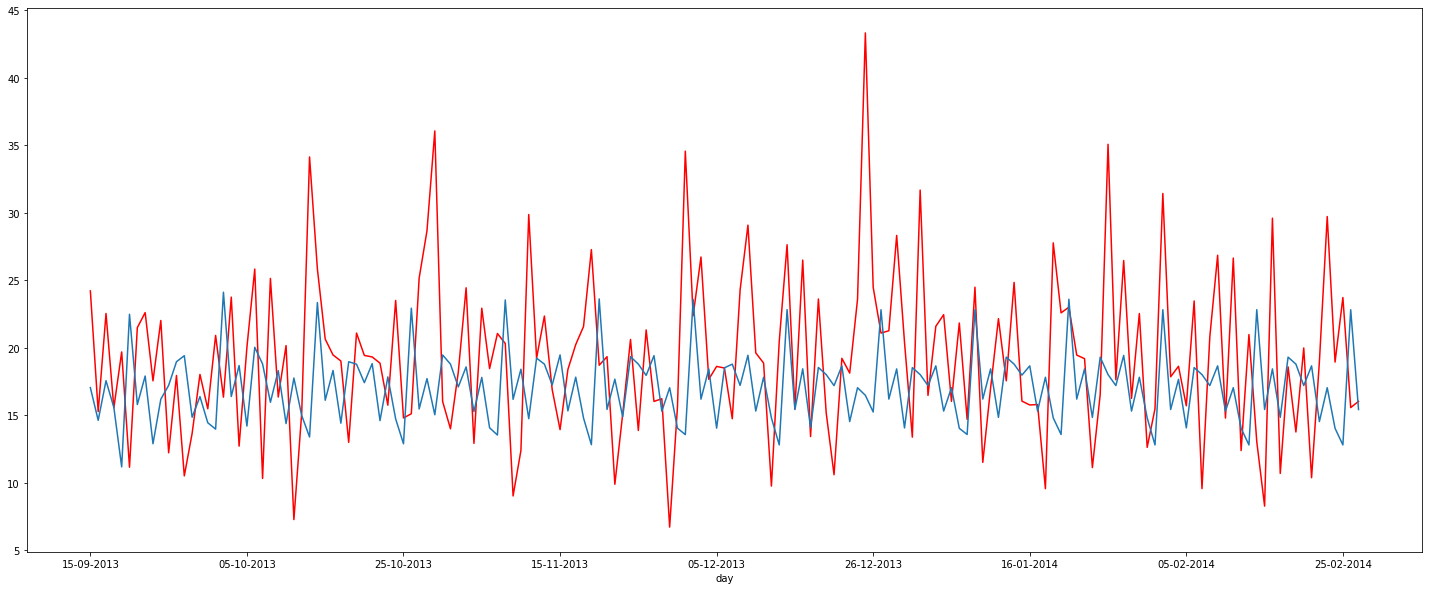

In [ ]:
test['overall_consumption'].plot(figsize=(25,10),color = 'red')
test['predicted'].plot()
plt.show()

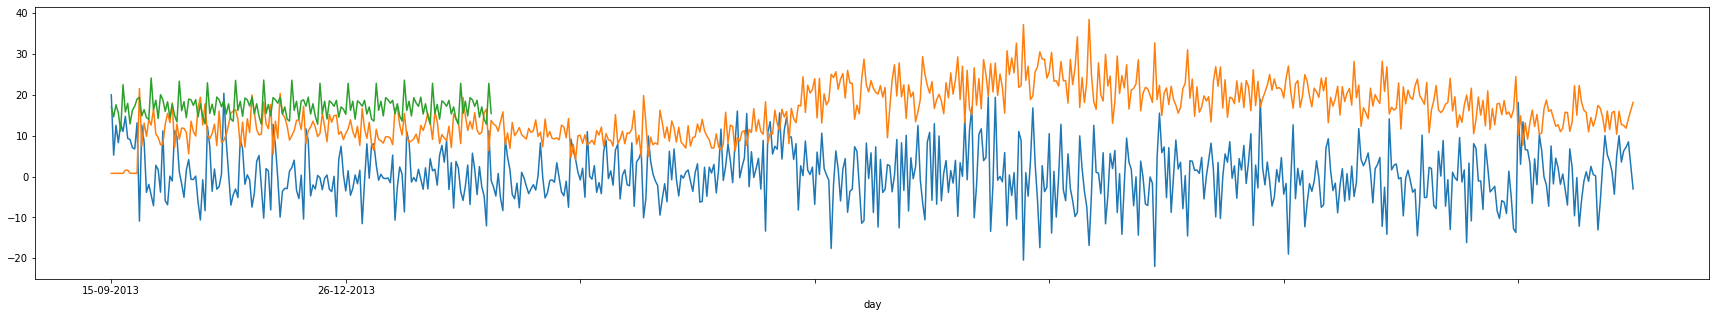

In [ ]:
model_fit.resid.plot(figsize= (30,5))
model_fit.fittedvalues.plot(figsize = (30,5))
test.predicted.plot()

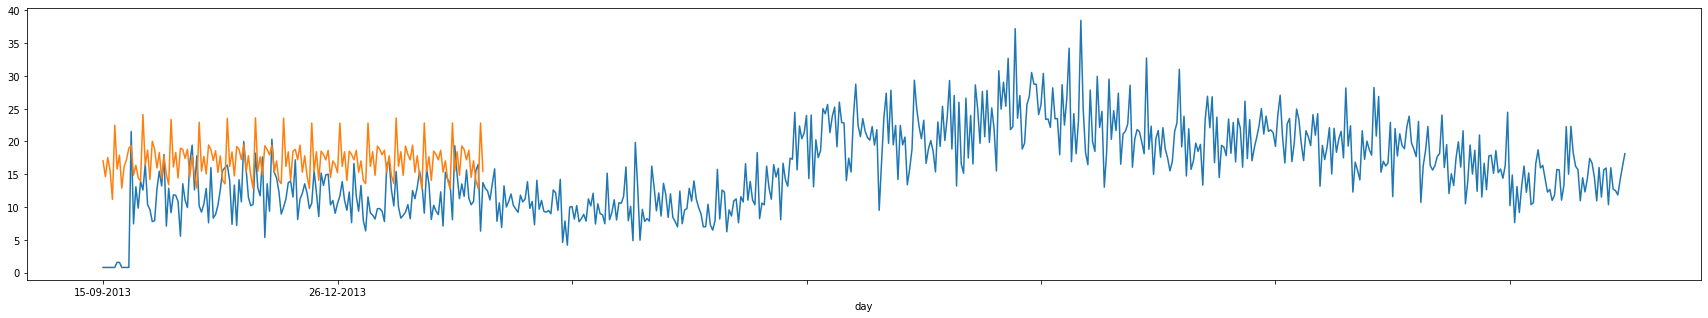

In [ ]:
model_fit.fittedvalues.plot(figsize = (30,5))
test.predicted.plot()

In [ ]:
def plot_rolling_mean_std(ts):
    rolling_mean = ts.rolling(7).mean()
    rolling_std = ts.rolling(7).std()
    plt.figure(figsize=(22,10))

    plt.plot(ts, label='Actual Mean')
    plt.plot(rolling_mean, label='Rolling Mean')
    plt.plot(rolling_std, label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Rolling Standard Deviation')
    plt.legend()
    plt.show()

In [ ]:
# Augmented Dickey–Fuller test
def perform_dickey_fuller_test(ts):
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('Critical Values:' ,result[4])


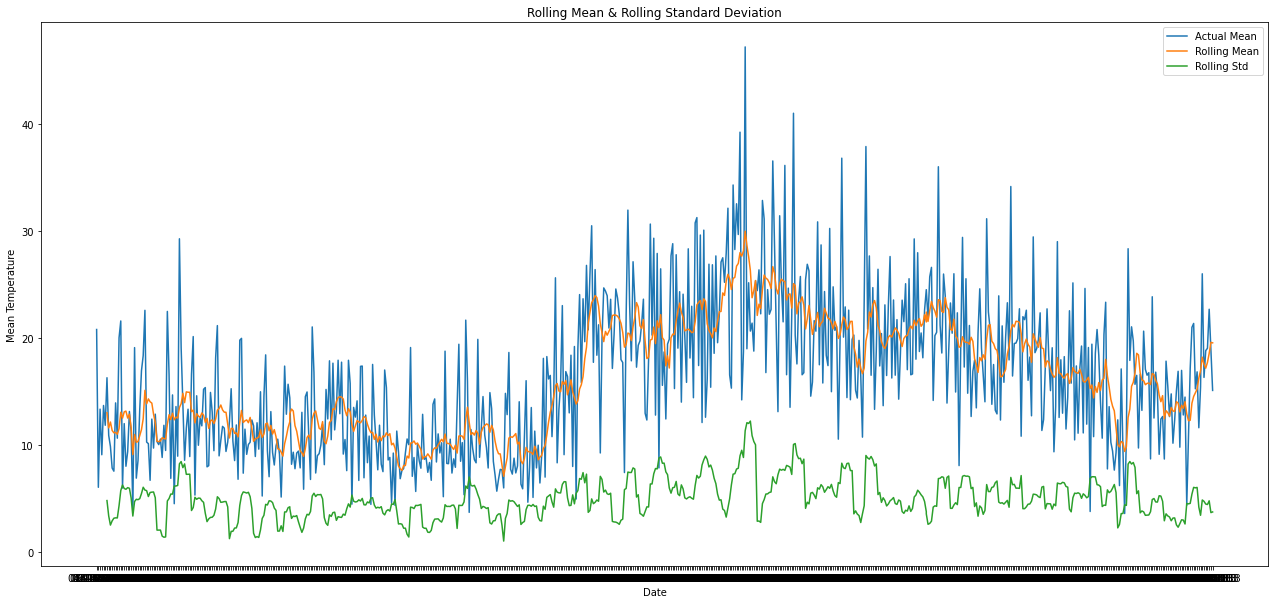

Test statistic:  -1.601199467546149
Critical Values: {'1%': -3.4407890899441127, '5%': -2.8661459340578905, '10%': -2.5692228868342766}


In [ ]:
# check stationary: mean, variance(std)and adfuller test
from statsmodels.tsa.stattools import adfuller
plot_rolling_mean_std(train.overall_consumption)
perform_dickey_fuller_test(train.overall_consumption)

In [ ]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

In [ ]:
# # MAPE value function
# def mean_absolute_percentage_error(y_true, y_pred): 
#     y_true, y_pred = np.array(y_true), np.array(y_pred)
#     return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# # Evaluation result
# def evaluate_ts(testY,testPredict):
#     MAE = round(median_absolute_error(testY,testPredict),4)
#     MAPE = round(mean_absolute_percentage_error(testY,testPredict),4)
#     MSE = round(mean_squared_error(testY,testPredict),4)
#     RMSE = round(math.sqrt(MSE),4)
#     return MAE,MAPE,MSE,RMSE

def MLP(block,household,train_percent,look_back,epochs):
    df_test = reframe_dataset(block,household)
    df_tc = df_test['total_consumption']
    df_tc = pd.DataFrame(df_tc)
#     df_tc
    dataset = df_tc.values
#     print(dataset)
#     print(int(train_percent))
    #dataset = dataset.astype('float32')
    train_size = int(len(dataset) * train_percent)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,0], dataset[train_size:len(dataset),0]
#     print(len(train), len(test))

#     look_back = 3
    trainX, trainY = create_dataset(train, int(look_back))
    testX, testY = create_dataset(test, int(look_back))

#     print("Train:",trainX.shape, trainY.shape)
#     print("Test:",testX.shape, testY.shape)
    
    # create and fit Multilayer Perceptron model
    model = Sequential()
    model.add(Dense(12, input_dim=int(look_back), activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=int(epochs), batch_size=2, verbose=2)


    # Estimate model performance
    trainScore = model.evaluate(trainX, trainY, verbose=0)
#     print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
    testScore = model.evaluate(testX, testY, verbose=0)
#     print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

    # generate predictions for training
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)

    # shift train predictions for plotting
    trainPredictPlot = np.empty_like(dataset)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

    # shift test predictions for plotting
    testPredictPlot = np.empty_like(dataset)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

    fig_map, gr = plt.subplots()
    
def reframe_dataset(block,household):
    hh_name = "hhblock_dataset/block_"+str(block)+".csv"
    df = pd.read_csv(hh_name)
    df_test = df[df['LCLid'] == str(household)]
    df_test['total_consumption'] = round(df_test.sum(axis=1),2)
    df_test['day_'] = pd.to_datetime(df_test['day'], format='%d-%m-%Y')
    df_test['year'] = pd.DatetimeIndex(df_test['day_']).year
    df_test['month'] = pd.DatetimeIndex(df_test['day_']).month
    df_test['date'] = pd.DatetimeIndex(df_test['day_']).day
    df_test = df_test[['day','total_consumption','date','month','year']]
    return df_test

# Split dataset into train and test sets
def split_to_train_test(dataset,train_percent):
    dataset = dataset.values
    train_size = int(len(dataset) * train_percent)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size,0], dataset[train_size:len(dataset),0]
    print(len(train), len(test))
    return train,test

In [ ]:
train_percent = 0.8
look_back = 2
dataset = hh_data[['overall_consumption']]
dataset = dataset.values


train_size = int(len(dataset) * train_percent)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,0], dataset[train_size:len(dataset),0]


trainX, trainY = create_dataset(train, int(look_back))
testX, testY = create_dataset(test, int(look_back))

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dense
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(12, input_dim=int(look_back), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=400, batch_size=2, verbose=2)


# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
#     print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
#     print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

Epoch 1/400
324/324 - 1s - loss: 115.3380 - 1s/epoch - 3ms/step
Epoch 2/400
324/324 - 0s - loss: 40.7834 - 353ms/epoch - 1ms/step
Epoch 3/400
324/324 - 0s - loss: 40.2341 - 347ms/epoch - 1ms/step
Epoch 4/400
324/324 - 0s - loss: 40.0080 - 360ms/epoch - 1ms/step
Epoch 5/400
324/324 - 0s - loss: 39.4572 - 358ms/epoch - 1ms/step
Epoch 6/400
324/324 - 0s - loss: 39.3119 - 353ms/epoch - 1ms/step
Epoch 7/400
324/324 - 0s - loss: 38.6670 - 341ms/epoch - 1ms/step
Epoch 8/400
324/324 - 0s - loss: 38.7818 - 354ms/epoch - 1ms/step
Epoch 9/400
324/324 - 0s - loss: 38.7956 - 336ms/epoch - 1ms/step
Epoch 10/400
324/324 - 0s - loss: 38.2378 - 348ms/epoch - 1ms/step
Epoch 11/400
324/324 - 0s - loss: 37.8743 - 347ms/epoch - 1ms/step
Epoch 12/400
324/324 - 0s - loss: 38.1701 - 368ms/epoch - 1ms/step
Epoch 13/400
324/324 - 0s - loss: 37.6172 - 336ms/epoch - 1ms/step
Epoch 14/400
324/324 - 0s - loss: 37.5769 - 332ms/epoch - 1ms/step
Epoch 15/400
324/324 - 0s - loss: 37.6260 - 361ms/epoch - 1ms/step
Epoch 

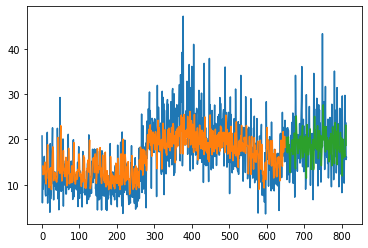

In [ ]:
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
MAE,MAPE,MSE,RMSE = evaluate_ts(testY,testPredict)
print('MAE:', MAE,'MAPE:', MAPE,'MSE:',MSE,'RMSE:',RMSE)

MAE: 3.7596725048339845 MAPE: 29.76129646693374 MSE: 45.651844579981365 RMSE: 6.756614875807364
